In [1]:
import numpy as np
import math
import os
import pickle
import operator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib2
import time
import csv
from collections import defaultdict
from scipy.misc import imread
from scipy.misc import imresize
from gensim import corpora, models
from collections import defaultdict
import matplotlib.pyplot as plot
import operator



In [2]:
# Load results
with open("data2/20-topic-res-all-filtered.txt", "rb") as fp:
    img_by_topic = pickle.load(fp)


In [3]:
shot_dict = {}
# read from csv file
with open('shot_info.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in reader:
         shot_dict[row[0]] = [int(row[1].split(',')[0]), int(row[2])]
            

In [4]:
# load the list of images
img_list = np.load('results_hannah_10_full_frame/hannah_10_img_list_filtered.npy')

In [5]:
a = []
topic_shot_img = {}
topic_shot_dict = {}
pshot = 'shot001,'
for topic in range(20):
    topic_shot_dict[topic] = defaultdict(float) 
    topic_shot_img[topic] = {}
    for index in range(0,100):
        int_frame = int(img_list[img_by_topic[topic][index][0]].split('.')[0].split('/')[-1])
        for key in shot_dict:
            if(int_frame >= shot_dict[key][0] and  int_frame <= shot_dict[key][1]):
                topic_shot_dict[topic][key] += 1
                if topic_shot_dict[topic][key] == 1:
                    topic_shot_img[topic][key] = img_list[img_by_topic[topic][index][0]]
    a.append(len(topic_shot_dict[topic]))
    for key in topic_shot_dict[topic]:
        #print key
        temp = topic_shot_dict[topic][key]
        topic_shot_dict[topic][key] /= float((shot_dict[key][1]-shot_dict[key][0]+1)/10)
        if(topic_shot_dict[topic][key] > 1):
            topic_shot_dict[topic][key] = 1.0


0


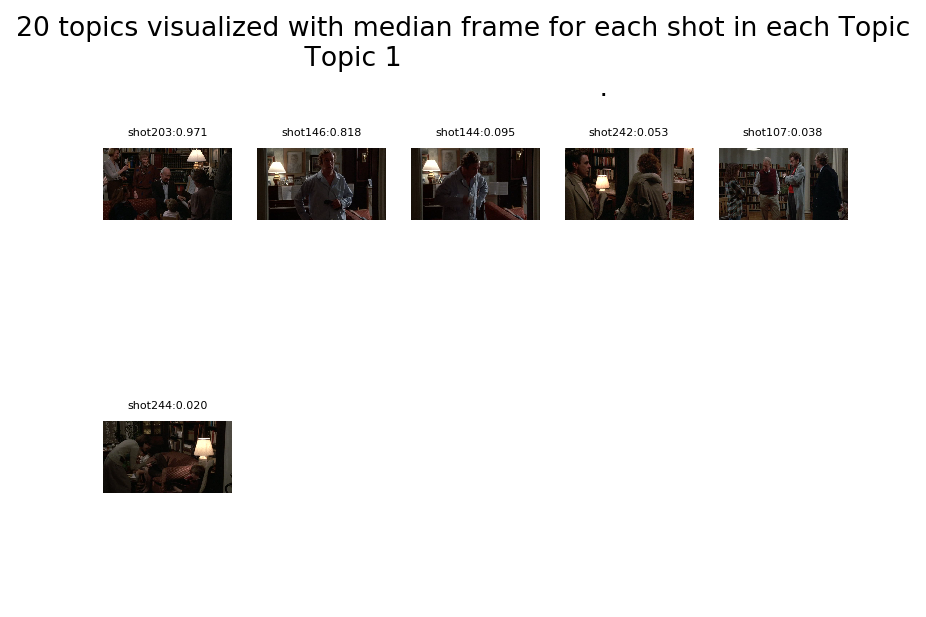

1


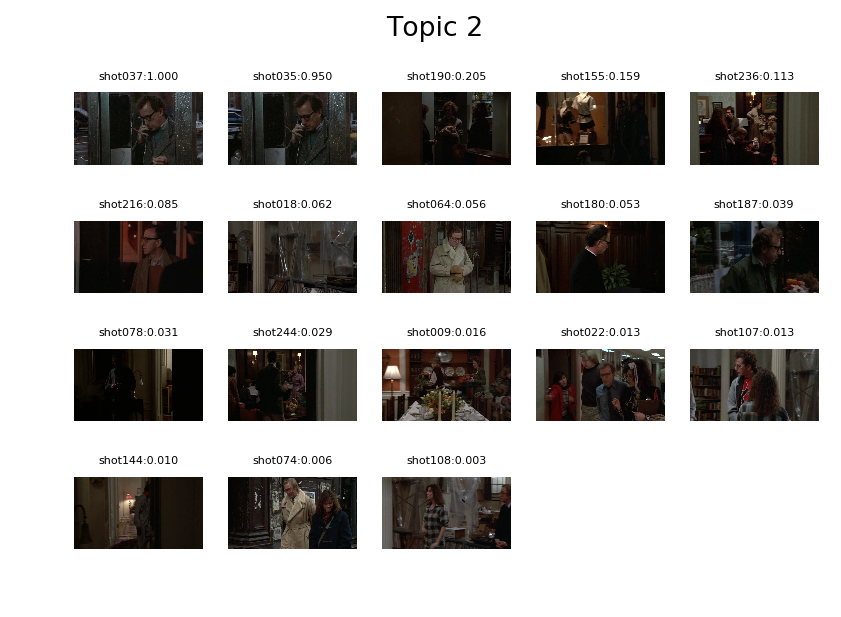

2


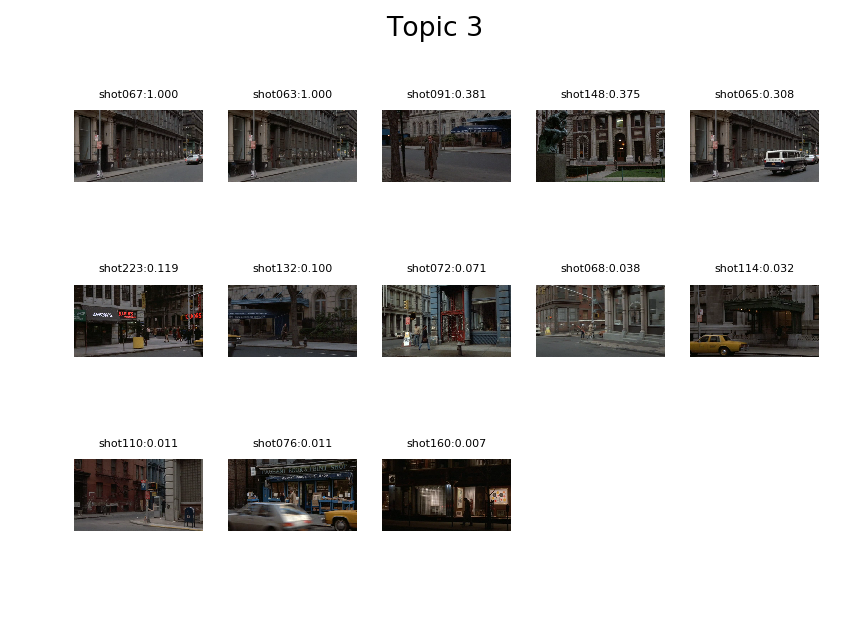

3


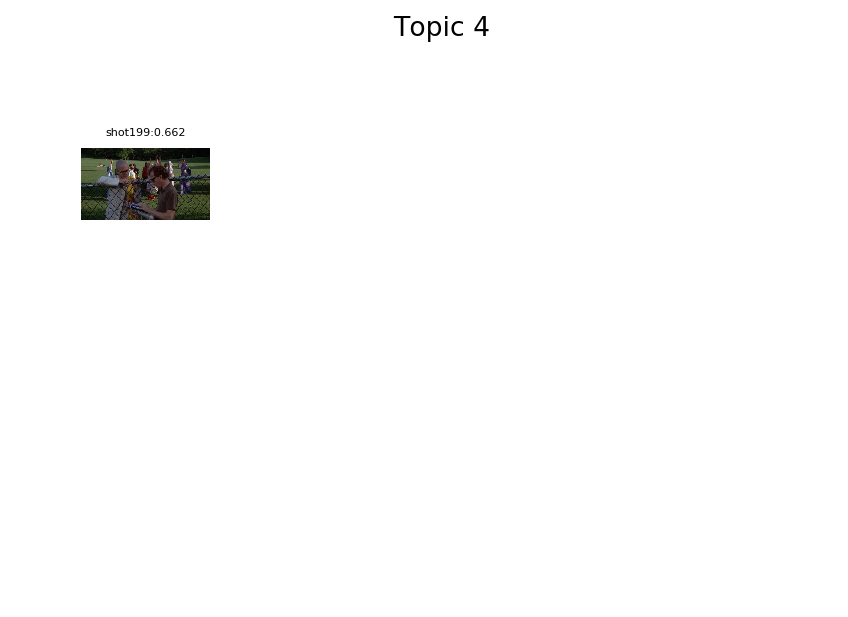

4


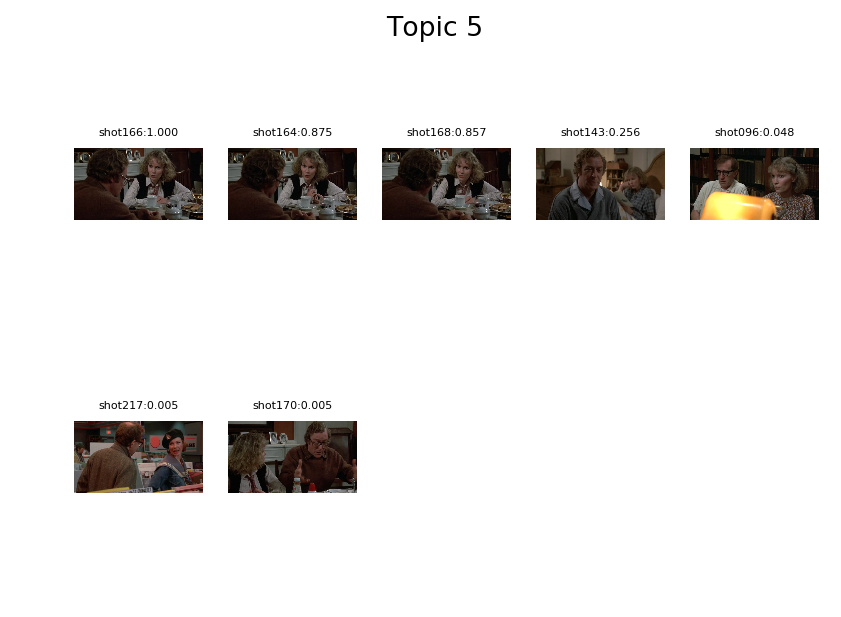

5


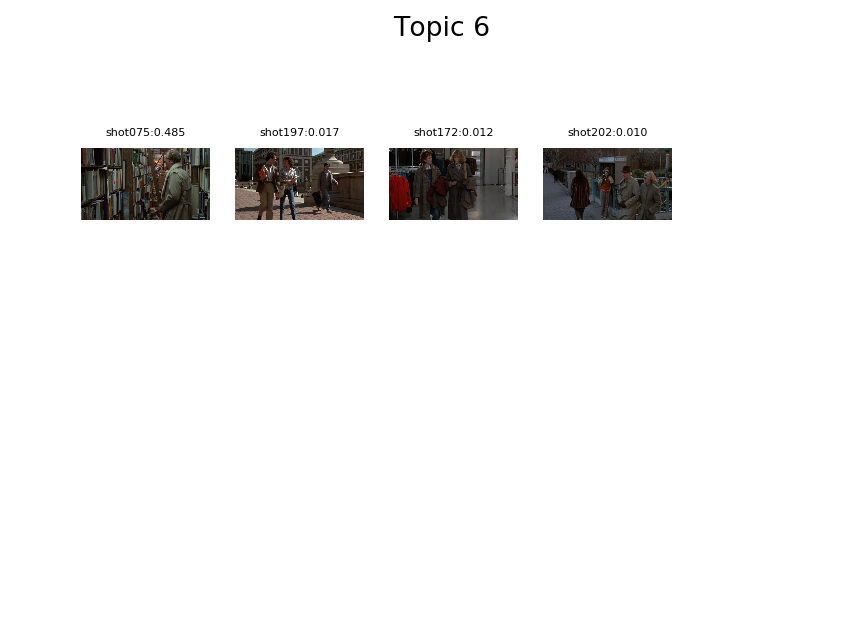

6


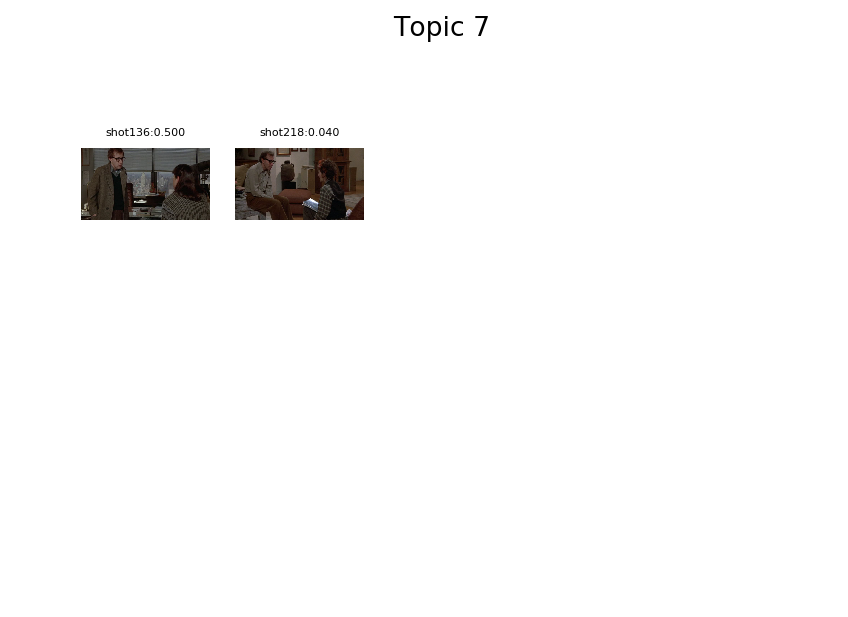

7


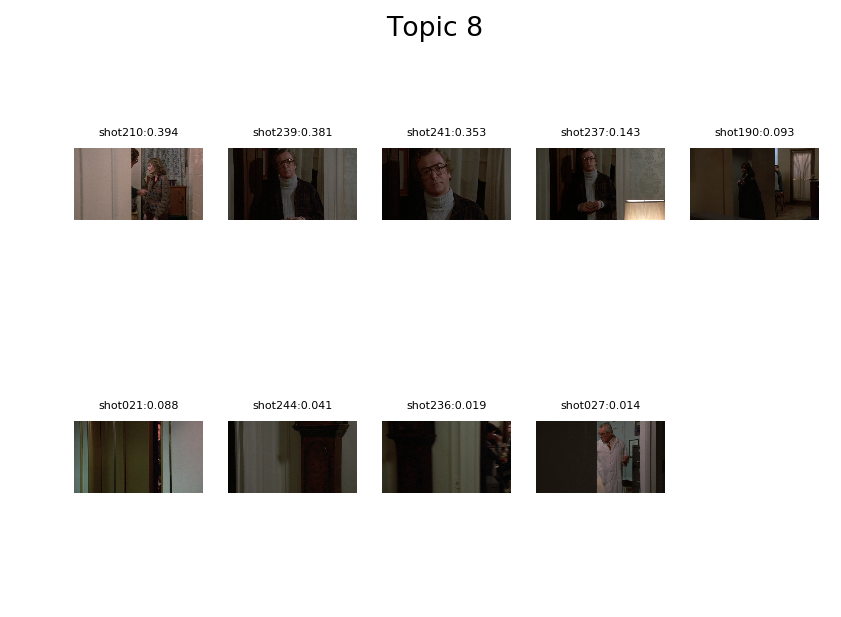

8


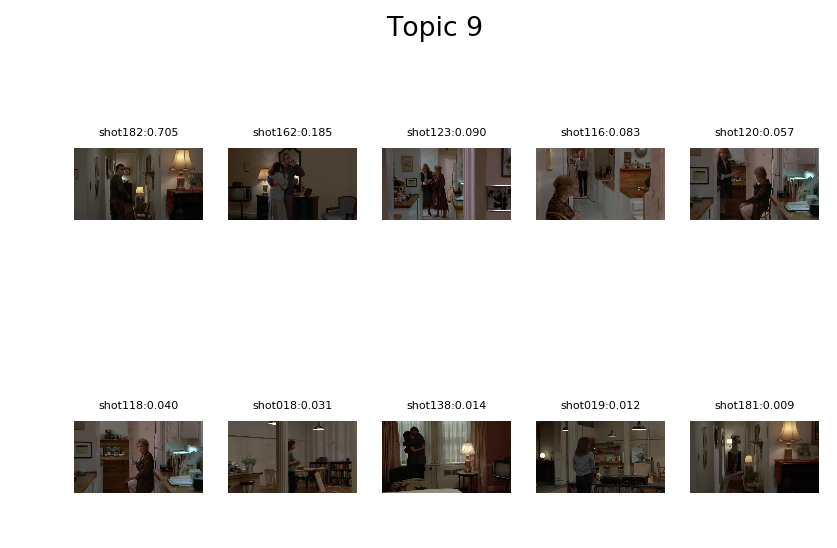

9


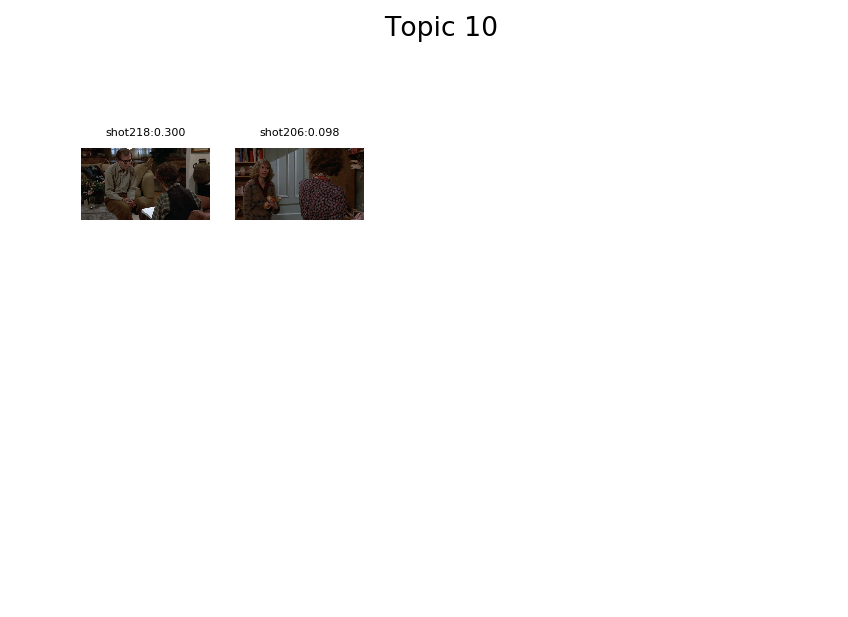

10


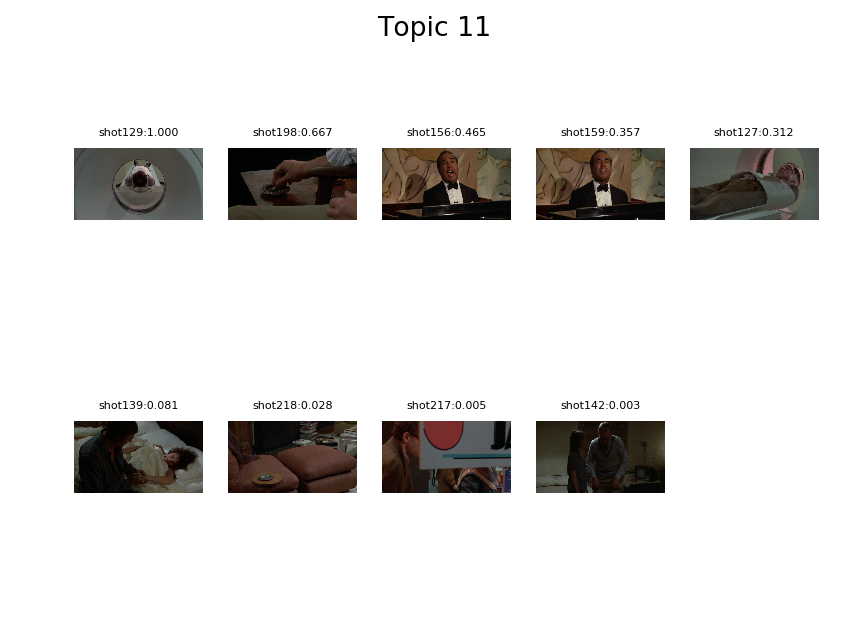

11


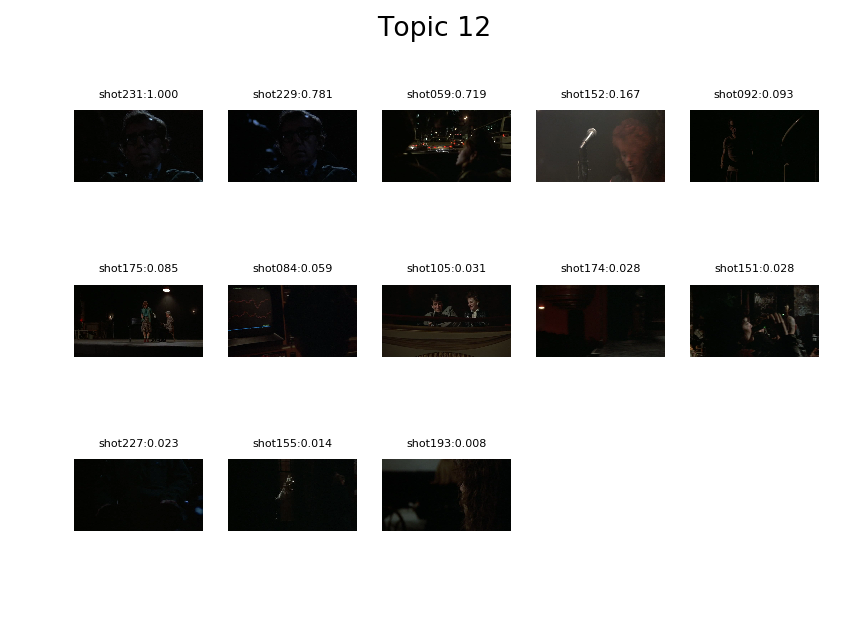

12


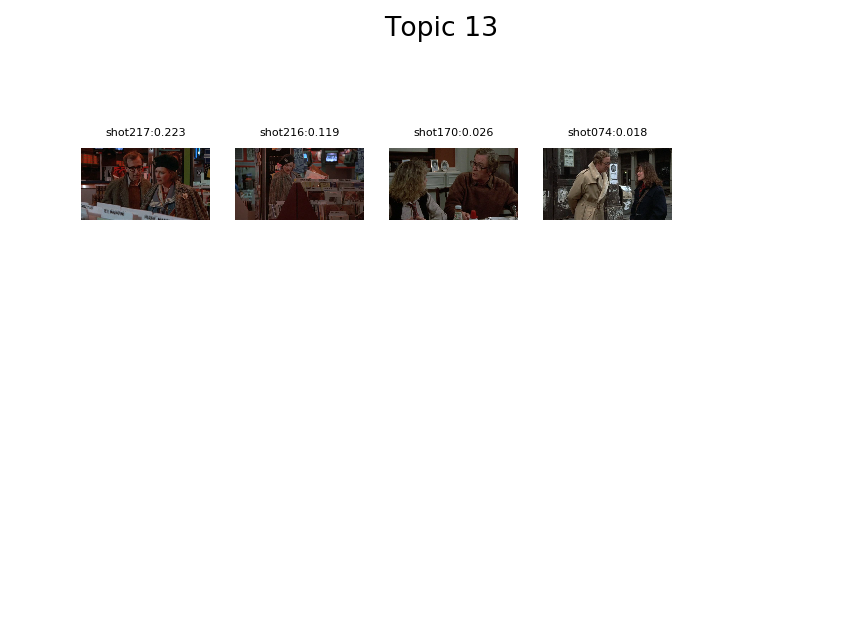

13


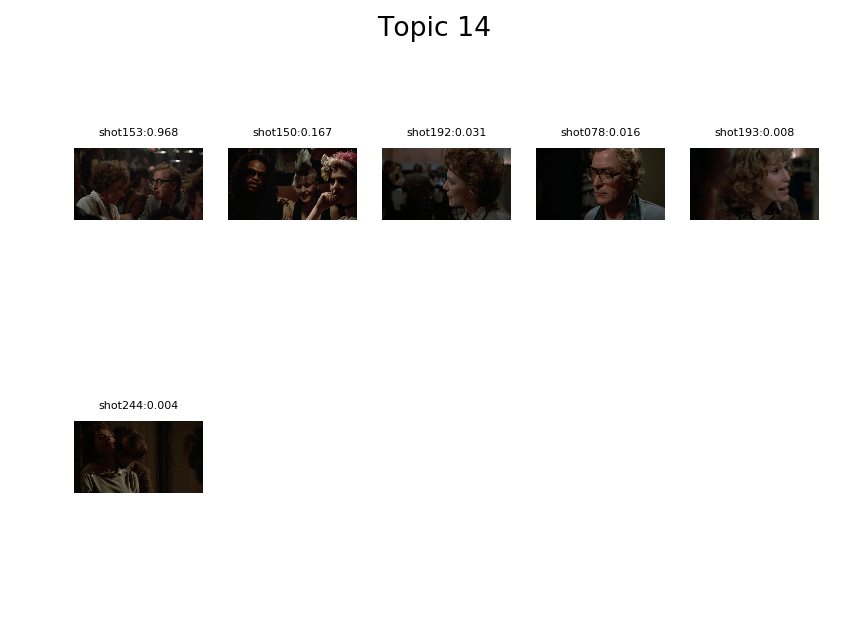

14


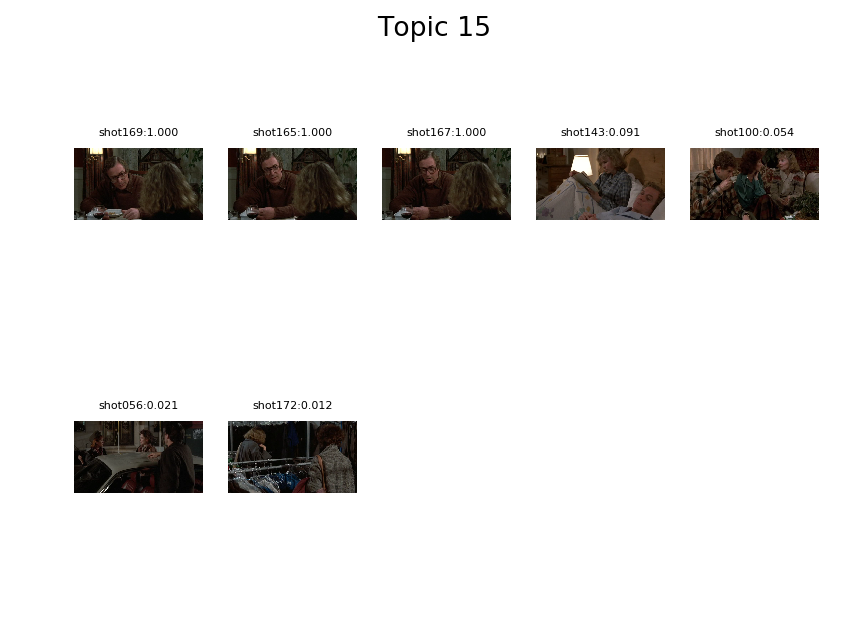

15


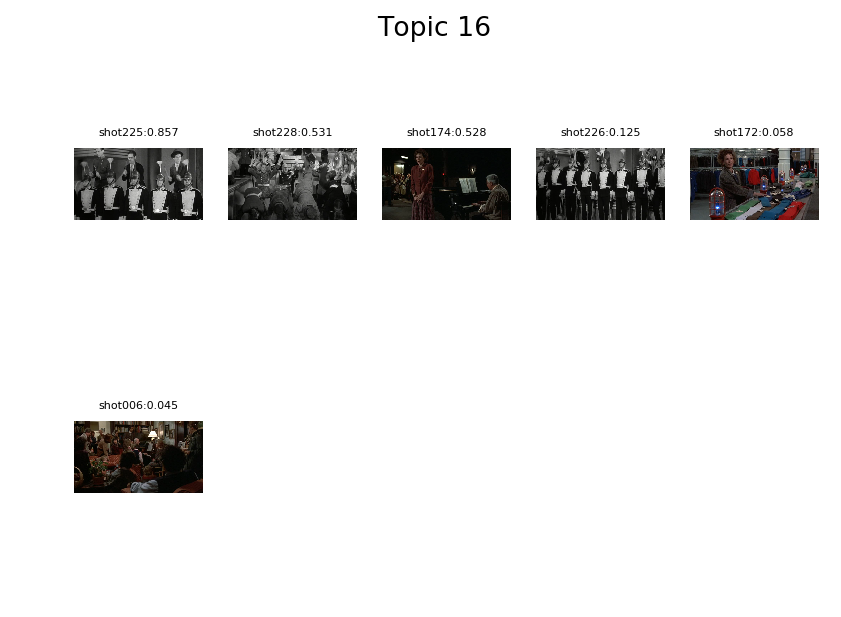

16


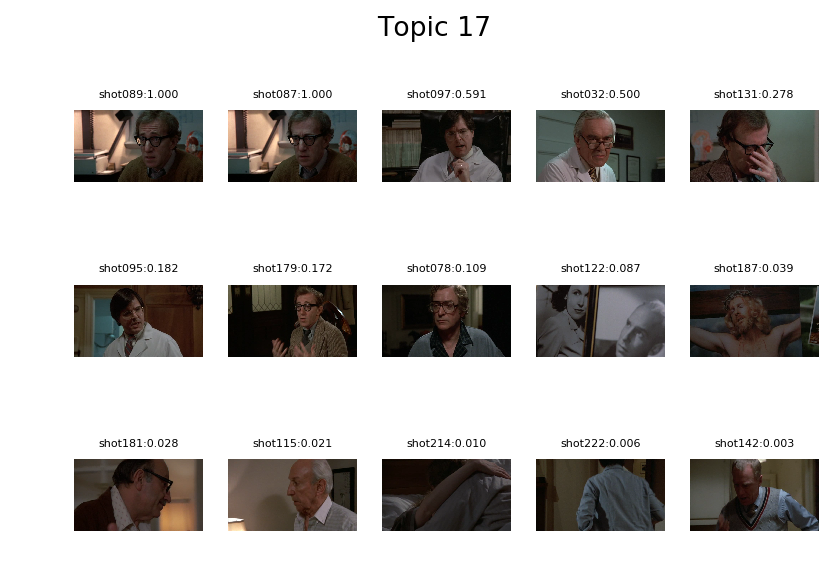

17


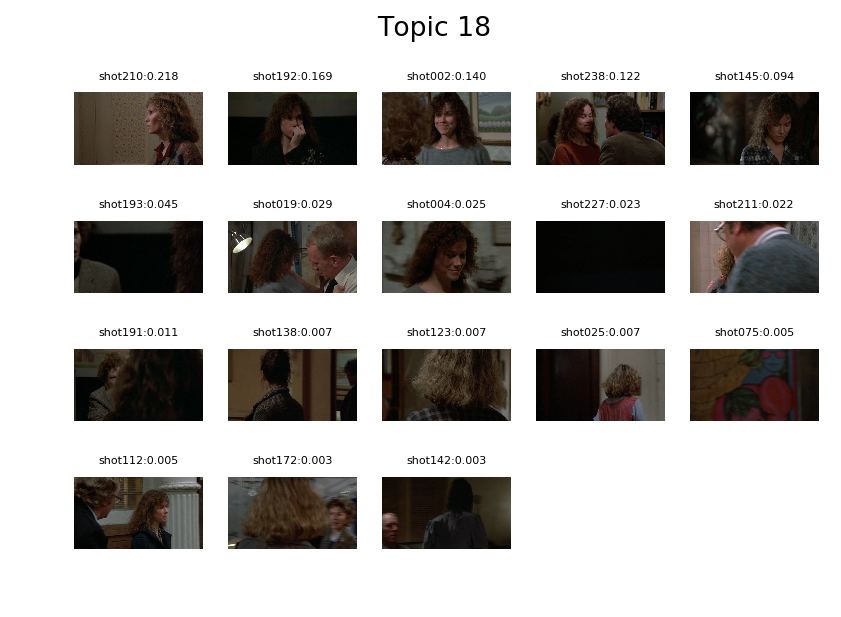

18


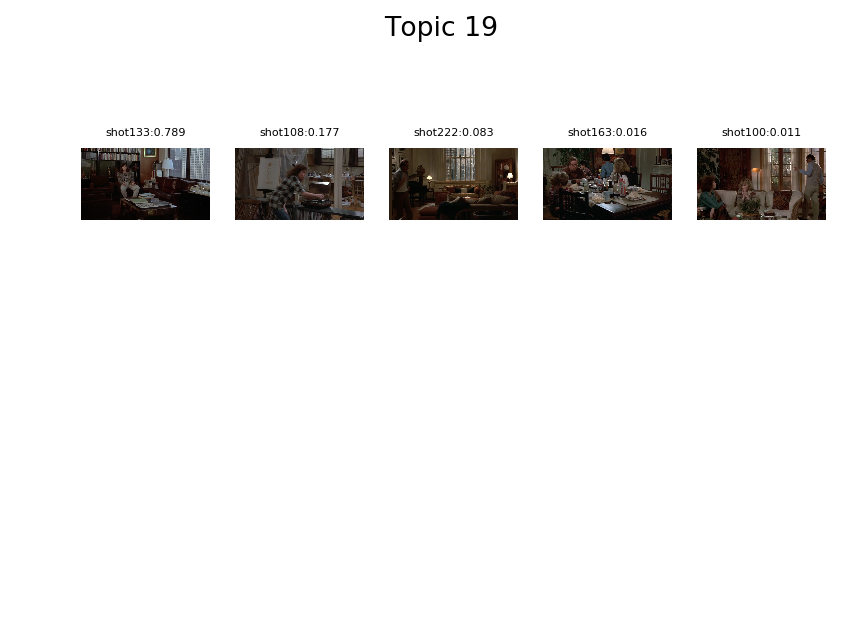

19


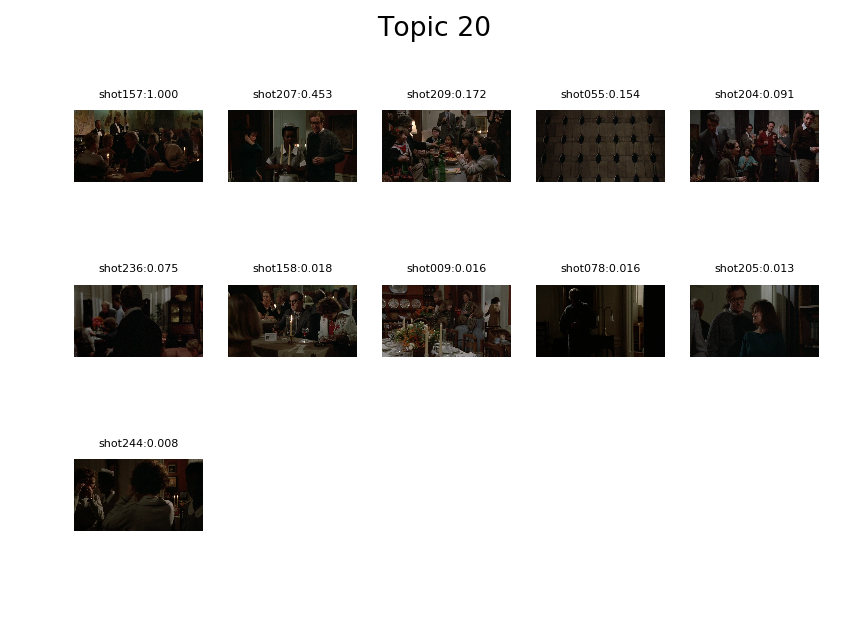

In [6]:
from skimage import exposure

path = '/mnt/nfs/scratch1/souyoungjin/datasets/Hannah/all_frames'
plot.close()
new_topic_shot_dict = {}
num_topics = 20
plt.close()
for topic in range(20):
    print topic
    new_topic_shot_dict[topic] = sorted(topic_shot_dict[topic].items(), key=operator.itemgetter(1), reverse = True)
    
    nrows = len(new_topic_shot_dict[topic])/float(5)
    
    if (nrows <= 1):
        nrows = 2
    else:
        nrows = math.ceil(nrows)
    
    
    fig, ax = plt.subplots(nrows=int(nrows), ncols=5, dpi=160)
    
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    fig.suptitle(str(num_topics)+' Topics: Topic '+str(topic+1))
    i = 0
    
    if(topic == 0):
        fig.suptitle('20 topics visualized with median frame for each shot in each Topic\n Topic 1                           \n                                 .\n')
    else:
        fig.suptitle('Topic '+str(topic+1))
    
    for row in ax:
            for col in row:
                if i == len(new_topic_shot_dict[topic]):
                    col.axis('off')
                    continue
                image_address = img_list[img_by_topic[topic][i][0]]
                (key, score) = new_topic_shot_dict[topic][i]
                if(key == pshot):
                    i += 1
                    col.axis('off')
                    continue
                #image = (int(shot_dict[key][0]) + int(shot_dict[key][1]))/2 
                #image_address = path+'/%08d.png'%image
                image_address = topic_shot_img[topic][key]
                command = "sshpass -p \'Cheman94*\' scp cmanjesh@gypsum.cs.umass.edu:"+image_address+" "+image_address.split('/')[8]
                os.system(command)
                I = imread(image_address.split('/')[8])
                #I = exposure.equalize_hist(I)
                #I += 15
                col.imshow(I, vmin=100, vmax=255)
                col.axis('off')
                col.set_title(key.split(',')[0]+':'+'%.3f'%score, fontsize=5)
                os.system('rm '+image_address.split('/')[8])
                i += 1
    plt.show() 